Cluster topics by their relative variations

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import *
import os

# Set the environment variable OMP_NUM_THREADS to 1
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans

In [40]:
def compute_cluster(fraction_views, nb_cluster) : 
    fraction_views_clustered = fraction_views.copy()
    kmeans = KMeans(nb_cluster, n_init= 10)
    kmeans.fit(fraction_views_clustered)
    fraction_views_clustered = kmeans.labels_
    return fraction_views_clustered

In [41]:
views_en = pd.read_csv('data/Philo_en.csv')
views_en['code'] = views_en['project'].str.split('.').str[0]
views_en['subject'] = views_en['article']

views_en

,project,article,timestamp,views,code,subject
0,en.wikipedia,Absurdism,2019060100,1021,en,Absurdism
1,en.wikipedia,Absurdism,2019060200,1204,en,Absurdism
2,en.wikipedia,Absurdism,2019060300,1341,en,Absurdism
3,en.wikipedia,Absurdism,2019060400,1524,en,Absurdism
4,en.wikipedia,Absurdism,2019060500,1397,en,Absurdism
...,...,...,...,...,...,...
248400,en.wikipedia,Zurvanism,2020122800,180,en,Zurvanism
248401,en.wikipedia,Zurvanism,2020122900,170,en,Zurvanism
248402,en.wikipedia,Zurvanism,2020123000,151,en,Zurvanism
248403,en.wikipedia,Zurvanism,2020123100,147,en,Zurvanism


In [42]:
views_en['rel_diff_views'] = views_en['views'].pct_change()
views_en['rel_diff_views'].fillna(0, inplace=True)
views_en

,project,article,timestamp,views,code,subject,rel_diff_views
0,en.wikipedia,Absurdism,2019060100,1021,en,Absurdism,0.000000
1,en.wikipedia,Absurdism,2019060200,1204,en,Absurdism,0.179236
2,en.wikipedia,Absurdism,2019060300,1341,en,Absurdism,0.113787
3,en.wikipedia,Absurdism,2019060400,1524,en,Absurdism,0.136465
4,en.wikipedia,Absurdism,2019060500,1397,en,Absurdism,-0.083333
...,...,...,...,...,...,...,...
248400,en.wikipedia,Zurvanism,2020122800,180,en,Zurvanism,-0.146919
248401,en.wikipedia,Zurvanism,2020122900,170,en,Zurvanism,-0.055556
248402,en.wikipedia,Zurvanism,2020123000,151,en,Zurvanism,-0.111765
248403,en.wikipedia,Zurvanism,2020123100,147,en,Zurvanism,-0.026490


In [43]:
article_counts = views_en.groupby('article').size()
print(article_counts.unique())
#drop philosophies where incorrtect number of datapoints 
views_en = views_en[views_en['article'].isin(article_counts[article_counts == 61].index)]
print(views_en['article'].unique().shape)

[ 581  578   67 1162  580  376  577  305  429  390  361  565 1743  579
  174]
(0,)


In [44]:
views_en 

,project,article,timestamp,views,code,subject,rel_diff_views


In [45]:
NB_CLUSTER = 50
arr = np.vstack(views_en.groupby('article')['rel_diff_views'].apply(lambda x: x.to_numpy()).to_numpy()).astype(float)
clusters1 = compute_cluster(arr, NB_CLUSTER)
clusters1
lang_clusters1 = pd.DataFrame({'Cluster_Labels': clusters1, 'Topic': views_en['article'].unique()})

for cluster_label, group in lang_clusters1.groupby('Cluster_Labels'):
    country_names = ', '.join(group['Topic'])
    print(f'Cluster {cluster_label}: {country_names}')

ValueError: need at least one array to concatenate

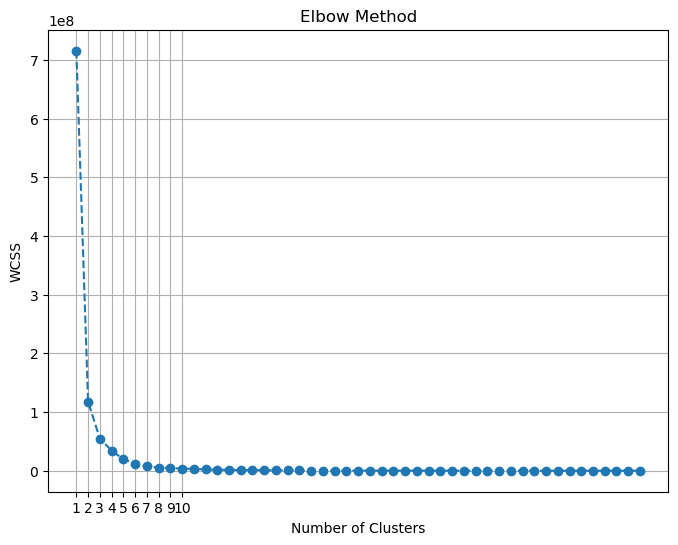

In [46]:
wcss = []
for i in range(1, 50):  # Trying different numbers of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init= 10)
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))  # Setting x-axis ticks from 1 to 10
plt.grid()

plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Cross-validate number of clusters
silhouette_scores = []
for i in range(2, 51):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(arr)
    labels = clustering.labels_
    score = silhouette_score(arr, labels)
    silhouette_scores.append(score)

# Find the optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores) + 2

print(f"The optimal number of clusters is: {optimal_clusters}")


def compute_cluster(fraction_views, nb_cluster):
    fraction_views_clustered = fraction_views.copy()
    clustering = AgglomerativeClustering(n_clusters=nb_cluster)
    clustering.fit(fraction_views_clustered)
    fraction_views_clustered = clustering.labels_
    return fraction_views_clustered

# Rest of the code remains the same
NB_CLUSTER = 50
arr = np.vstack(views_en.groupby('article')['rel_diff_views'].apply(lambda x: x.to_numpy()).to_numpy()).astype(float)
clusters2 = compute_cluster(arr, NB_CLUSTER)
clusters2
lang_clusters = pd.DataFrame({'Cluster_Labels': clusters2, 'Topic': views_en['article'].unique()})

for cluster_label, group in lang_clusters.groupby('Cluster_Labels'):
    country_names = ', '.join(group['Topic'])
    print(f'Cluster {cluster_label}: {country_names}')


The optimal number of clusters is: 2


ValueError: need at least one array to concatenate

In [ ]:
from sklearn.metrics import adjusted_rand_score
# Calculate the ARI
ari = adjusted_rand_score(clusters1, clusters2)
# Print the ARI
print(f"The Adjusted Rand Index between the two clustering approaches is: {ari}")

The Adjusted Rand Index between the two clustering approaches is: 1.0


## Introduction


In [49]:
views_en = pd.read_csv('data/Philo_en.csv')
views_en

,project,article,timestamp,views
0,en.wikipedia,Absurdism,2019060100,1021
1,en.wikipedia,Absurdism,2019060200,1204
2,en.wikipedia,Absurdism,2019060300,1341
3,en.wikipedia,Absurdism,2019060400,1524
4,en.wikipedia,Absurdism,2019060500,1397
...,...,...,...,...
248400,en.wikipedia,Zurvanism,2020122800,180
248401,en.wikipedia,Zurvanism,2020122900,170
248402,en.wikipedia,Zurvanism,2020123000,151
248403,en.wikipedia,Zurvanism,2020123100,147


In [63]:
print(views_en['article'].unique().shape)
time_series = views_en.groupby('timestamp')['views'].sum()
time_series_df = pd.DataFrame(time_series)
time_series_df

(426,)


,views
timestamp,
2019060100,218254
2019060200,250933
2019060300,262173
2019060400,264061
2019060500,268940
...,...
2020122800,279382
2020122900,281778
2020123000,296564


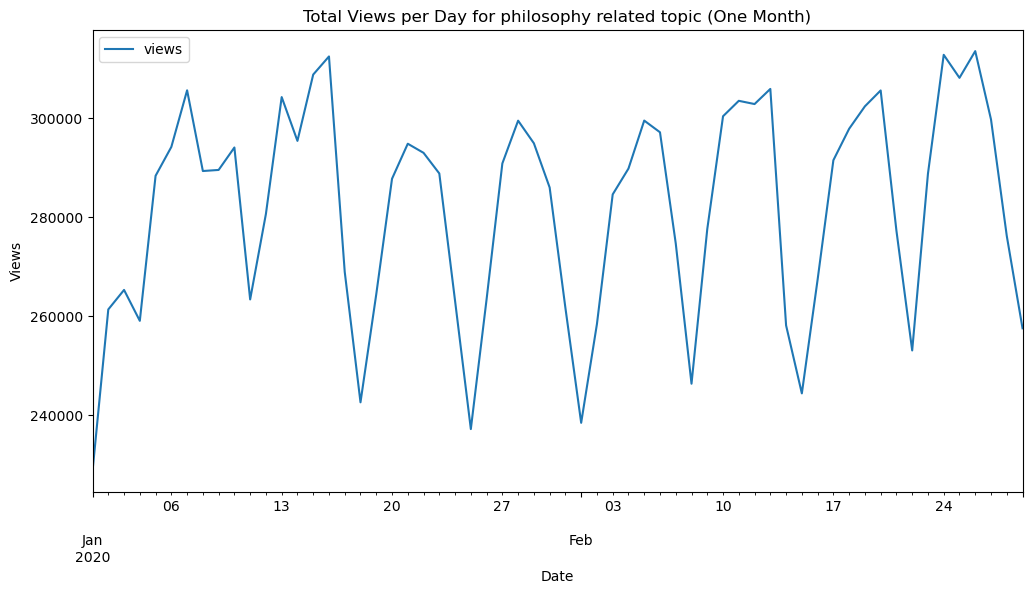

In [105]:
time_series_df.index = pd.to_datetime(time_series_df.index)

# Filter the data for one month
start_date = '2020-01-01'
end_date = '2020-02-29'  # Corrected the end date to be within the range

filtered_data = time_series_df.loc[start_date:end_date]

filtered_data.plot(figsize=(12, 6))
plt.title('Total Views per Day for philosophy related topic (One Month)')
plt.xlabel('Date')
plt.ylabel('Views')

plt.show()


The timestamps with the biggest upward trend changes are: DatetimeIndex(['2020-05-28'], dtype='datetime64[ns]', name='timestamp', freq=None)


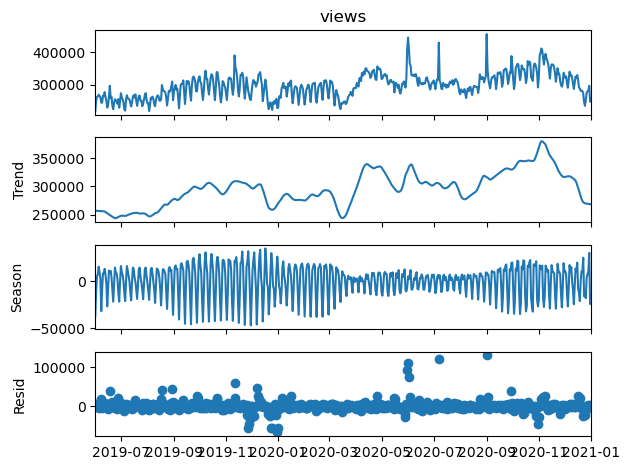

In [106]:
stl_after = STL(time_series_df['views'],period=7,robust=True)
#try 7   days period to acount for weed end trends 
res_after = stl_after.fit()
fig = res_after.plot()

trend_changes = res_after.trend.diff().abs().nlargest(1).index
print(f"The timestamps with the biggest upward trend changes are: {trend_changes}")
